In [55]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams, style
style.use('seaborn')

`gms_all` holds all match data, `gms_10` holds only 2010 data, `gms_14` holds on 2014 data and `gms_exc_14` holds all data excluding the 2014 match data.

In [56]:
gms_all = pd.read_csv('matches.csv')

gms_10 = gms_all.loc[gms_all['key']=='world.2010']
gms_14 = gms_all.loc[gms_all['key']=='world.2014']
gms_exc_14 = gms_all[gms_all['key']!='world.2014']
display(gms_10.describe())
display(gms_14.describe())

,id,round_id,score1,score2
count,64.000000,64.000000,64.00000,64.000000
mean,1606.500000,391.687500,1.18750,1.046875
std,18.618987,5.279114,1.34371,0.966579
min,1575.000000,382.000000,0.00000,0.000000
25%,1590.750000,387.000000,0.00000,0.000000
50%,1606.500000,392.500000,1.00000,1.000000
75%,1622.250000,396.250000,2.00000,1.250000
max,1638.000000,401.000000,7.00000,4.000000


,id,round_id,score1,score2
count,64.000000,64.000000,64.000000,64.000000
mean,834.500000,121.718750,1.359375,1.531250
std,18.618987,5.226516,1.186795,1.583333
min,803.000000,112.000000,0.000000,0.000000
25%,818.750000,117.000000,0.000000,0.000000
50%,834.500000,122.500000,1.000000,1.000000
75%,850.250000,126.250000,2.000000,3.000000
max,866.000000,131.000000,5.000000,7.000000


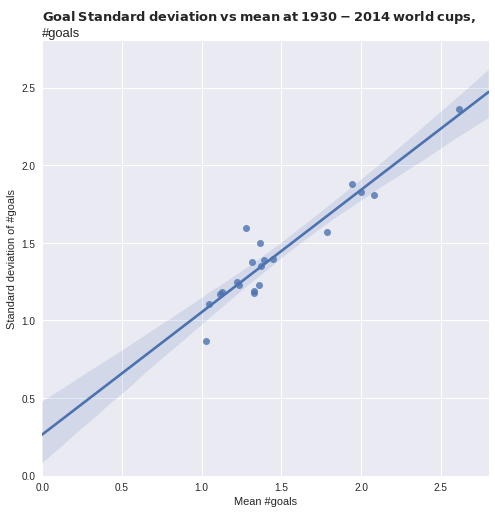

In [80]:
rcParams['figure.figsize'] = 8,8
gls = pd.concat([gms_all.rename(columns={'score1':'score'}),
                gms_all.rename(columns={'score2':'score','team1':'team2','team2':'team1'})])
gls_groups = gls.groupby('key')['score']
gls_means = gls_groups.mean().rename('mean')
gls_stds = gls_groups.std().rename('std')
std_mean_df = pd.concat([gls_means, gls_stds],axis=1)
plt.xlim(0, 2.8)
plt.ylim(0, 2.8)
g=sns.regplot(x='mean',y='std',data=std_mean_df).set_title('''Standard deviation of vs mean #goals scored at each world cup,
1930-2014''')
sns.despine()
plt.tick_params(bottom=False,left=False)
plt.xlabel('Mean #goals')
plt.ylabel('Standard deviation of #goals')
g.axes.set_title(r'''$\bf{Goal\:Standard\:deviation\:vs\:mean\:at\:1930-2014\:world\:cups,}$
#goals''',ha='left',position=(0,1),size=13)
plt.show()

It's necessary to 'mirror' all the matches due to symmetry before fitting the model.

In [58]:
gls_10 = pd.concat([gms_10.rename(columns={'score1':'score'}),
                    gms_10.rename(columns={'score2':'score','team1':'team2','team2':'team1'})])
poisson_model = smf.glm(formula="score ~ team1 + team2", data=gls_10, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  score   No. Observations:                  128
Model:                            GLM   Df Residuals:                       65
Model Family:                 Poisson   Df Model:                           62
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -136.98
Date:                Mon, 02 Jul 2018   Deviance:                       76.045
Time:                        15:51:40   Pearson chi2:                     66.7
No. Iterations:                    21   Covariance Type:             nonrobust
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -22.2783   1.69e+04     -0.001      0.999   -3.31e+04    3.31e+04
team1[T.Argentina]        22.0959   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.Australia]        22.4852   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.Brazil]           22.4561   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.Cameroon]         21.7755   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.Chile]            22.4197   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.Côte d'Ivoire]    22.1038   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.Denmark]          22.3803   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.England]          21.4962   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.France]           20.2928   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.Germany]          22.9326   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.Ghana]            21.6323   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.Greece]           20.9006   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.Honduras]          1.0206   2.31e+04   4.42e-05      1.000   -4.53e+04    4.53e+04
team1[T.Italy]            22.6408   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.Japan]            22.1368   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.Mexico]           21.4688   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.Netherlands]      22.6389   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.New Zealand]      21.5048   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.Nigeria]          21.3308   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.North Korea]      21.5388   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.Paraguay]         21.6884   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.Portugal]         22.4582   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.Serbia]           21.6839   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.Slovakia]         22.5414   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.Slovenia]         21.7745   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.South Africa]     21.5975   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.South Korea]      21.9451   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.Spain]            22.5100   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.Switzerland]      21.1111   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.United States]    22.2145   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
team1[T.Uruguay]          22.0332   1.69e+04      0.001      0.999  

Now define the wrapper function for the predictions. In the event of previously unseen teams, resort to using the arithmetic means.

In [59]:
pd.set_option('mode.chained_assignment', None)
def pred_team_gls(model, team1, team2, gls_df, have_teams=None):
    if have_teams is None: #initialises when first run
        have_teams = set(gls_df['team1'])|set(gls_df['team2'])
    if team1 in have_teams: 
        if team2 in have_teams:
            pred = model.predict(pd.DataFrame(data={'team1': team1, 'team2': team2},index=[0])).values[0]
        else:
            team1_gls = pd.concat([gls_df.loc[gls_df['team1']==team1,'score1'],
                                gls_df.loc[gls_df['team2']==team1,'score2']])
            pred = team1_gls.mean()
    else:
        if team2 in have_teams:
            team2_gls = pd.concat([gls_df.loc[gls_df['team1']==team2,'score1'],
                                gls_df.loc[gls_df['team2']==team2,'score2']])
            pred = team2_gls.mean()        
        else:
            pred = gls_df['score'].mean()
    return np.round(pred,8)

gms_14['pred1'] = gms_14.apply(lambda r: pred_team_gls(poisson_model, r['team1'],r['team2'], gls_10), axis=1)
gms_14['pred2'] = gms_14.apply(lambda r: pred_team_gls(poisson_model, r['team2'],r['team1'], gls_10), axis=1)
pred_14_df = gms_14[['score1', 'score2', 'team1', 'team2', 'pred1', 'pred2']]
pred_14_df.head()

,score1,score2,team1,team2,pred1,pred2
0,3,1,Brazil,Croatia,0.750000,0.750000
1,1,0,Mexico,Cameroon,0.652688,1.338506
2,1,5,Spain,Netherlands,0.885424,0.436429
3,3,1,Chile,Australia,2.303845,2.222653
4,3,0,Colombia,Greece,1.000000,1.000000


Create a function to evaluate the model.

In [60]:
def evaluate_predictions(pred_df, score1='score1', score2='score2',
                        pred1='pred1', pred2='pred2'):
    score1_mae = mae(gms_14[score1], gms_14[pred1])
    score2_mae = mae(gms_14[score2], gms_14[pred2])
    display('score1_mae is {}'.format(score1_mae))
    display('score2_mae is {}'.format(score2_mae))
    display('combined mae is {}'.format((score1_mae+score2_mae)/2))
    
evaluate_predictions(gms_14)

'score1_mae is 1.14221197'

'score2_mae is 1.3622858896875'

'combined mae is 1.25224892984375'

The Negative Binomial model offers a slight improvement over the Poisson

In [61]:
nbinom_model = smf.glm(formula="score ~ team1 + team2", data=gls_10, 
                        family=sm.families.NegativeBinomial()).fit()
gms_14.loc[:,'pred1'] = gms_14.apply(lambda r: pred_team_gls(nbinom_model, r['team1'],r['team2'], gls_10), axis=1)
gms_14.loc[:,'pred2'] = gms_14.apply(lambda r: pred_team_gls(nbinom_model, r['team2'],r['team1'], gls_10), axis=1)

evaluate_predictions(gms_14)

'score1_mae is 1.1256913885937498'

'score2_mae is 1.3099595985937498'

'combined mae is 1.2178254935937498'

Time to train on more data (excluding 2014) and see what the results look like.

In [62]:
gls_exc_14 = pd.concat([gms_exc_14.rename(columns={'score1':'score'}),
                    gms_exc_14.rename(columns={'score2':'score','team1':'team2','team2':'team1'})])
regr = smf.glm(formula="score ~ team1 + team2", data=gls_exc_14, 
                        family=sm.families.Poisson()).fit()
display(regr.summary())
gms_14['pred1'] = gms_14.apply(lambda r: pred_team_gls(regr, r['team1'],r['team2'], gls_exc_14), axis=1)
gms_14['pred2'] = gms_14.apply(lambda r: pred_team_gls(regr, r['team2'],r['team1'], gls_exc_14), axis=1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  score   No. Observations:                 1544
Model:                            GLM   Df Residuals:                     1385
Model Family:                 Poisson   Df Model:                          158
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2192.0
Date:                Mon, 02 Jul 2018   Deviance:                       1721.8
Time:                        15:51:41   Pearson chi2:                 1.56e+03
No. Iterations:                    22   Covariance Type:             nonrobust
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.4847      0.507     -0.955      0.339      -1.479       0.510
team1[T.Angola]                       -0.8761      1.089     -0.804      0.421      -3.011       1.259
team1[T.Argentina]                     0.8823      0.426      2.073      0.038       0.048       1.717
team1[T.Australia]                     0.3657      0.551      0.664      0.507      -0.714       1.445
team1[T.Austria]                       0.8315      0.444      1.873      0.061      -0.038       1.701
team1[T.Belgium]                       0.5162      0.444      1.163      0.245      -0.354       1.386
team1[T.Bolivia]                      -1.3171      1.084     -1.215      0.224      -3.441       0.807
team1[T.Brazil]                        1.1728      0.421      2.787      0.005       0.348       1.998
team1[T.Bulgaria]                      0.2234      0.468      0.477      0.633      -0.694       1.141
team1[T.Cameroon]                      0.1707      0.490      0.348      0.728      -0.790       1.132
team1[T.Canada]                      -21.8974   2.49e+04     -0.001      0.999   -4.88e+04    4.88e+04
team1[T.Chile]                         0.6769      0.449      1.507      0.132      -0.203       1.557
team1[T.China]                       -22.0382   2.46e+04     -0.001      0.999   -4.82e+04    4.81e+04
team1[T.Colombia]                      0.3212      0.503      0.638      0.524      -0.666       1.308
team1[T.Costa Rica]                    0.6092      0.513      1.188      0.235      -0.396       1.614
team1[T.Croatia]                       0.5444      0.497      1.095      0.274      -0.430       1.519
team1[T.Cuba]                          0.6938      0.665      1.043      0.297      -0.610       1.998
team1[T.Czech Republic]                0.4523      0.719      0.629      0.529      -0.957       1.862
team1[T.Czechoslovakia (-1992)]        0.6430      0.447      1.437      0.151      -0.234       1.520
team1[T.Côte d'Ivoire]                 0.7707      0.543      1.418      0.156      -0.294       1.836
team1[T.Denmark]                       0.9763      0.460      2.122      0.034       0.075       1.878
team1[T.Dutch East Indies (-1945)]   -22.2576   4.38e+04     -0.001      1.000   -8.59e+04    8.59e+04
team1[T.East Germany (-1989)]          0.3571      0.614      0.582      0.561      -0.845       1.560
team1[T.Ecuador]                       0.5172      0.566      0.914      0.361      -0.592       1.627
team1[T.Egypt]                         0.3540      0.717      0.494      0.621      -1.051       1.759
team1[T.El Salvador]                  -1.4624      1.085     -1.348      0.178      -3.588       0.663
team1[T.England]                       0.6689      0.430      1.554      0.120      -0.175       1.512
team1[T.France]                        0.9297      0.428      2.172     

By using more training data, the prediction error goes down significantly.

In [63]:
evaluate_predictions(gms_14)

'score1_mae is 1.0343669218749998'

'score2_mae is 1.2575602362499998'

'combined mae is 1.1459635790624998'

The Negative Binomial again offers a small improvement.

In [64]:
regr = smf.glm(formula="score ~ team1 + team2", data=gls_exc_14, 
                        family=sm.families.NegativeBinomial()).fit()
gms_14['pred1'] = gms_14.apply(lambda r: pred_team_gls(regr, r['team1'],r['team2'], gls_exc_14), axis=1)
gms_14['pred2'] = gms_14.apply(lambda r: pred_team_gls(regr, r['team2'],r['team1'], gls_exc_14), axis=1)
evaluate_predictions(gms_14)

'score1_mae is 1.02920588984375'

'score2_mae is 1.2507499242187499'

'combined mae is 1.13997790703125'

Now use all available data to predict results for the 2018 matches.

In [65]:
gls_all = pd.concat([gms_all.rename(columns={'score1':'score'}),
                    gms_all.rename(columns={'score2':'score','team1':'team2','team2':'team1'})])
pred_df = pd.read_csv('group_matches_2018_raw.csv')
regr_all = smf.glm(formula="score ~ team1 + team2", data=gls_all, 
                        family=sm.families.NegativeBinomial()).fit()
pred_df['pred1'] = pred_df.apply(lambda r: 
    pred_team_gls(regr_all, r['team1'],r['team2'], gls_all), axis=1)
pred_df['pred2'] = pred_df.apply(lambda r: 
    pred_team_gls(regr_all, r['team2'],r['team1'], gls_all), axis=1)
pred_df['pred1'] = np.round(pred_df['pred1'],0)
pred_df['pred2'] = np.round(pred_df['pred2'],0)
pred_df

,team1,team2,score1,score2,pred1,pred2
0,Russia,Saudi Arabia,5.0,0.0,3.0,1.0
1,Egypt,Uruguay,0.0,1.0,1.0,1.0
2,Russia,Egypt,NaN,NaN,1.0,1.0
3,Uruguay,Saudi Arabia,NaN,NaN,3.0,1.0
4,Uruguay,Russia,NaN,NaN,2.0,1.0
5,Saudi Arabia,Egypt,NaN,NaN,0.0,2.0
6,Morocco,Iran,0.0,1.0,1.0,1.0
7,Portugal,Spain,3.0,3.0,1.0,1.0
8,Portugal,Morocco,NaN,NaN,2.0,1.0
9,Iran,Spain,NaN,NaN,0.0,2.0
